# Partie 1 - Data préparation

Préparation du jeu de données en vu de son utilisation par les algorythmes de segmentation.

In [2]:
%pip install matplotlib 
%pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.



---
### **1**. Importation de bibliothèques.

In [5]:
# Importation des bibliothèques
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow


---
### **2**. Importation du jeu de données `hotelReservations.csv`

In [6]:
# Importation du jeu de données 'hotelReservations.csv' dans la variable df et affichage des 4 premières lignes
df = pd.read_csv('./hotelReservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


---


---
### **3**. Analyse et Transformation des données`

In [7]:
# Transformer les colonnes avec des valeurs "float" en valeurs "int"
df['avg_price_per_room'] = df['avg_price_per_room'].astype(int)


---

In [8]:
# On s'aperçoit que les variables/colonnes sont essentiellement des int ou string
df.dtypes

Booking_ID                              object
no_of_adults                             int64
no_of_children                           int64
no_of_weekend_nights                     int64
no_of_week_nights                        int64
type_of_meal_plan                       object
required_car_parking_space               int64
room_type_reserved                      object
lead_time                                int64
arrival_year                             int64
arrival_month                            int64
arrival_date                             int64
market_segment_type                     object
repeated_guest                           int64
no_of_previous_cancellations             int64
no_of_previous_bookings_not_canceled     int64
avg_price_per_room                       int32
no_of_special_requests                   int64
booking_status                          object
dtype: object

---

In [9]:
# Vérifier qu'il n'y a pas de colonnes avec des valeurs nulles
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

---

In [10]:
# Transformer les valeurs "Canceled" et "Not_Canceled" (de la variable "booking_status") en booléen (0 ou 1)
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Encoder les valeurs de la colonne booking_status
df['booking_status_encoded'] = label_encoder.fit_transform(df['booking_status'])

# Créer un dictionnaire de correspondance des valeurs
booking_status_mapping = {'Not_Canceled': 0, 'Canceled': 1}

# Remplacer les valeurs de la colonne room_type_reserved par les valeurs numériques correspondantes
df['booking_status_encoded'] = df['booking_status'].map(booking_status_mapping)

---

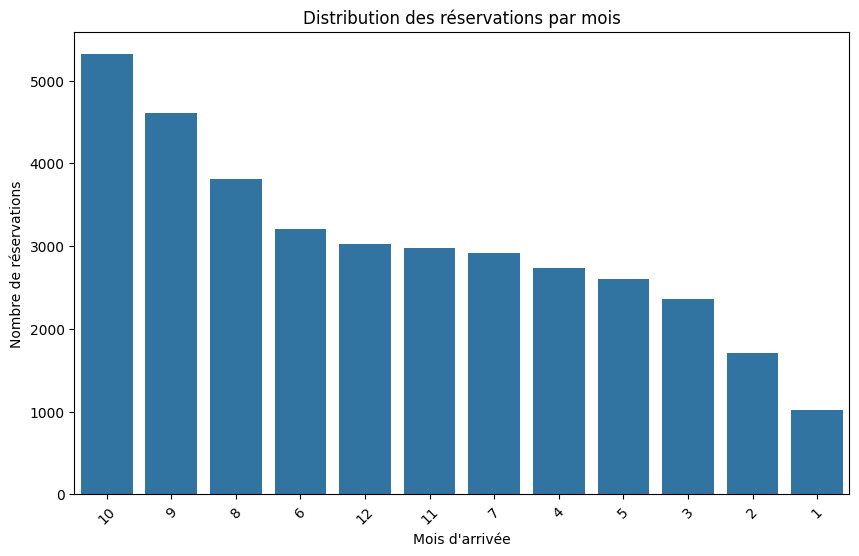

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_month', data=df, order=df['arrival_month'].value_counts().index)
plt.title('Distribution des réservations par mois')
plt.xlabel('Mois d\'arrivée')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)
plt.show()

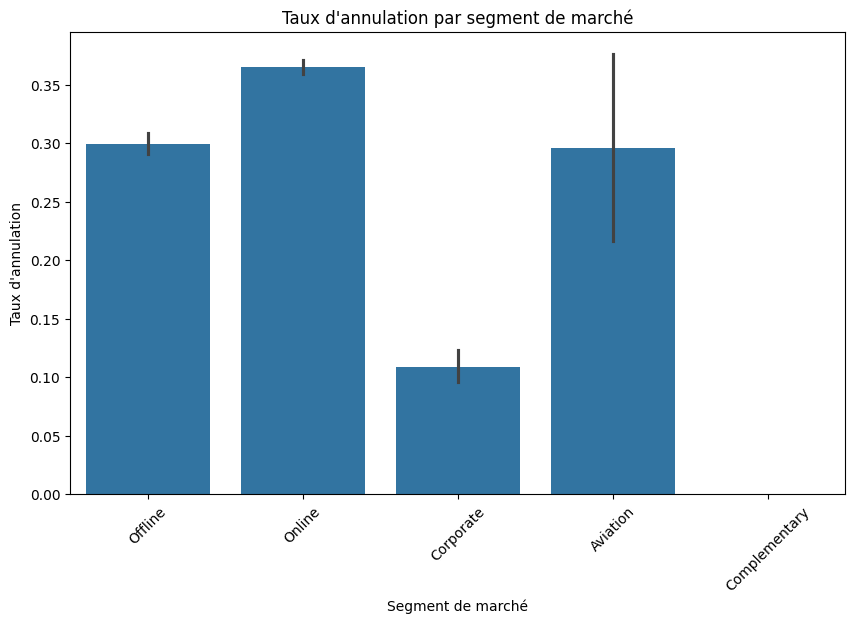

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment_type', y='booking_status_encoded', data=df, estimator=lambda x: sum(x==1)/len(x))
plt.title('Taux d\'annulation par segment de marché')
plt.xlabel('Segment de marché')
plt.ylabel('Taux d\'annulation')
plt.xticks(rotation=45)
plt.show()

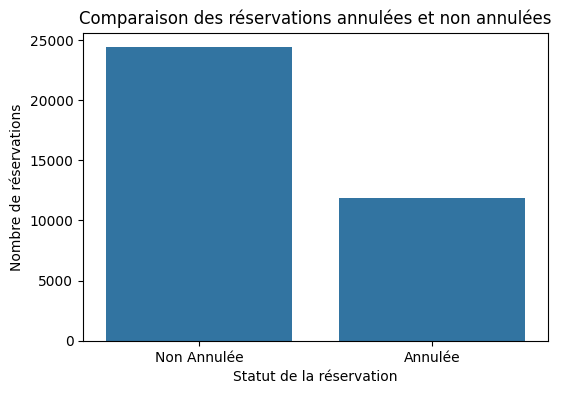

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df)
plt.title('Comparaison des réservations annulées et non annulées')
plt.xlabel('Statut de la réservation')
plt.ylabel('Nombre de réservations')
plt.xticks([0, 1], ['Non Annulée', 'Annulée'])
plt.show()

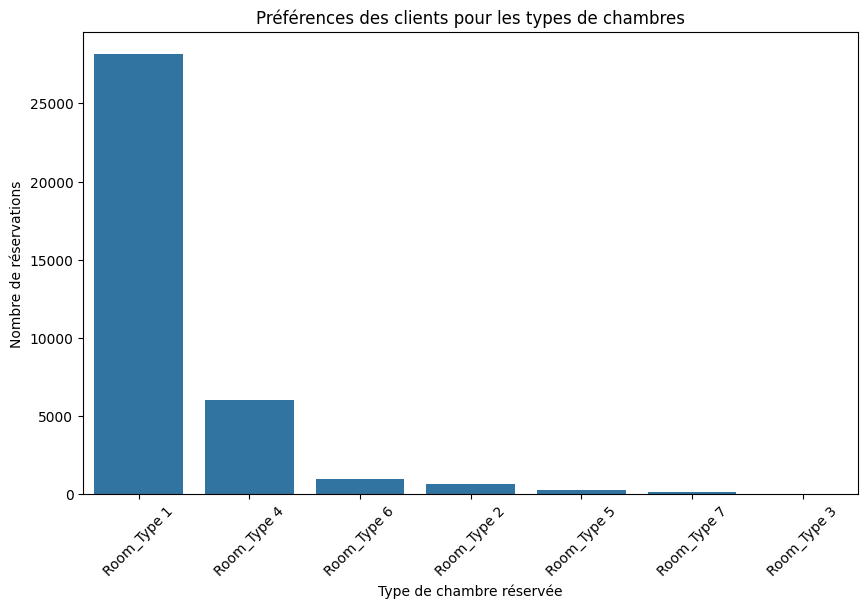

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type_reserved', data=df, order=df['room_type_reserved'].value_counts().index)
plt.title('Préférences des clients pour les types de chambres')
plt.xlabel('Type de chambre réservée')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)
plt.show()

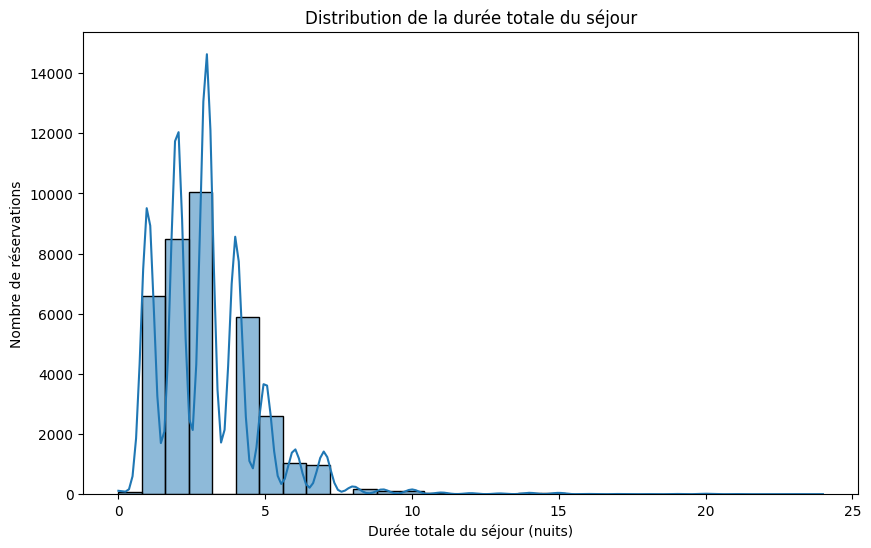

In [15]:
df['total_stay_duration'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
plt.figure(figsize=(10, 6))
sns.histplot(x='total_stay_duration', data=df, bins=30, kde=True)
plt.title('Distribution de la durée totale du séjour')
plt.xlabel('Durée totale du séjour (nuits)')
plt.ylabel('Nombre de réservations')
plt.show()

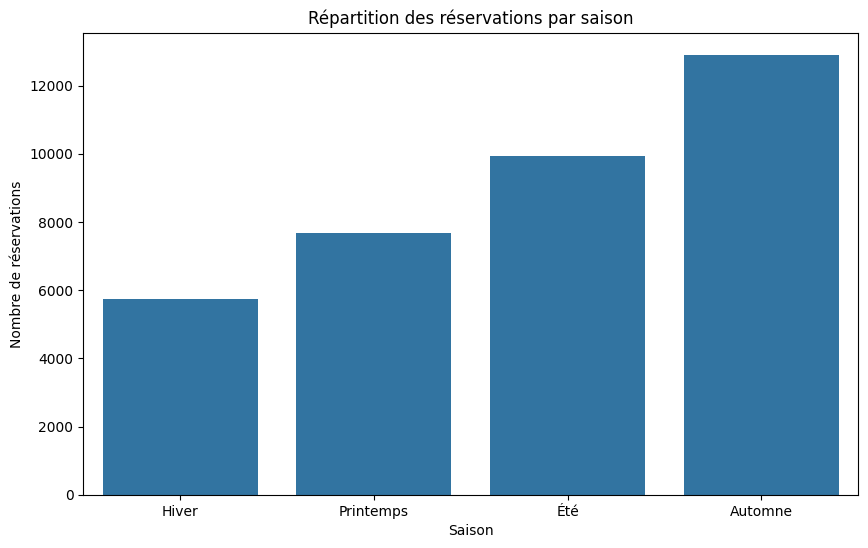

In [16]:
seasons = {
    1: 'Hiver', 2: 'Hiver', 3: 'Printemps',
    4: 'Printemps', 5: 'Printemps', 6: 'Été',
    7: 'Été', 8: 'Été', 9: 'Automne',
    10: 'Automne', 11: 'Automne', 12: 'Hiver'
}
df['season'] = df['arrival_month'].map(seasons)
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df, order=['Hiver', 'Printemps', 'Été', 'Automne'])
plt.title('Répartition des réservations par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de réservations')
plt.show()

In [17]:
# Création de la variable y contenant la colonne 'booking_status' du jeu de données df
y = df.booking_status_encoded
y

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status_encoded, Length: 36275, dtype: int64

---

In [18]:
# Création de la variable X contenant des données/colonnes spécifiques à partir du jeu df
data_clean = df.drop(['Booking_ID','room_type_reserved', 'market_segment_type', 'type_of_meal_plan', 'booking_status', 'booking_status_encoded', 'season', 'total_stay_duration'], axis=1)
X = data_clean
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,0,0,167,1
36271,2,0,1,3,0,228,2018,10,17,0,0,0,90,2
36272,2,0,2,6,0,148,2018,7,1,0,0,0,98,2
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94,0


---
**Installation de la bibliothèque sklearn avec la commande pip dans la cellule suivante.**

In [19]:
# Installation de la bibliothèque sklearn avec la commande pip
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


---
**Séparation du jeu de données en jeu d'entrainement/test.**

Le jeu d'entrainement servira à l'entraînement des algorithmes, alors que le jeu de test servira à évaluer l'alogoritme.

In [54]:
# Import du module train_test_split de la bibliothèque sklearn.model_selection :
from sklearn.model_selection import train_test_split

# Séparation du jeu de données jeu d'entrainement (train) et enjeu d'évaluation (test) :  train_test_split(X, y, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [55]:
y.value_counts()/len(y)*100

booking_status_encoded
0    67.236389
1    32.763611
Name: count, dtype: float64

In [22]:
y_train.value_counts()/len(y_train)*100

booking_status_encoded
0    67.236389
1    32.763611
Name: count, dtype: float64

In [23]:
# Affichage X_train
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
20062,2,0,2,2,0,134,2017,12,4,0,0,0,65,0
19656,2,0,2,1,0,101,2018,8,20,0,0,0,109,2
30566,2,0,0,1,0,56,2018,6,8,0,0,0,120,0
28004,3,0,1,4,1,145,2018,8,8,0,0,0,148,2
7207,2,0,0,3,0,17,2018,8,24,0,0,0,165,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,0,2,0,1,0,3,2018,6,16,0,0,0,131,0
31649,2,0,2,1,0,116,2018,5,14,0,0,0,112,0
32413,2,0,0,3,0,42,2017,11,4,0,0,0,60,0
25244,3,0,4,6,0,95,2018,7,30,0,0,0,149,0


In [24]:
# Affichage X_test
X_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
21427,2,0,1,1,0,69,2018,4,30,0,0,0,140,0
29546,2,0,1,3,0,322,2018,5,19,0,0,0,80,0
12613,2,0,0,2,0,86,2017,9,24,0,0,0,120,0
16317,2,0,2,2,0,11,2017,10,23,0,0,0,88,0
5927,3,0,0,1,0,66,2018,7,29,0,0,0,137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18204,1,0,0,0,0,83,2017,12,17,0,0,0,0,1
29464,2,0,2,2,0,47,2018,3,11,0,0,0,86,1
24609,2,0,0,4,0,112,2018,4,27,0,0,0,99,0
25904,1,0,0,3,0,166,2018,11,1,0,0,0,110,0


---
---
---



# Partie 2 - Entrainement des algorithmes (Machine-Learning)


## 2.1 - Algorithmes des K-voisins les plus proches (KNN)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png'>


---


In [25]:
# Import de la fonction accuracy_score de la bibliothèque sklearn
from sklearn.metrics import accuracy_score

In [26]:
# Import du modèle KNeighborsClassifier de la bibliothèque sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Définition du modèle KNN dans la variable knn
knn = KNeighborsClassifier(n_neighbors= 5)

---
**Entraînement du modèle KNN avec le jeu de données d'entrainement.**
La nomenclature est : `knn.fit(X_train, y_train)` où `knn` est notre modèle.

In [27]:
# Entraînement du modèle knn
knn.fit(X_train, y_train)

KNeighborsClassifier()

---
**Prédiction à partir du modèle `knn` à partir deq données test X et assignation de cette prédiction dans une varibla `y_pred`.**

La nomenclature est : `y_pred = knn.predict(X_test)` où `model` doit être remplacé par: `knn`.

In [28]:
# Prédiction du modèle knn à partir des données test
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

---
**Evaluation de la performance du modèle `knn`**.


In [29]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

print("Matrice de confusion: \n")
print(confusion_matrix(y_test, y_pred))

Matrice de confusion: 

[[4371  507]
 [ 902 1475]]


In [30]:
# Import du module permettant d'évaluer notre modèle
from sklearn.metrics import confusion_matrix

# Fonction permettant d'évaluer le modèle en fonction des 2 types de booking status
def evaluation(y_pred, y_test):
    matrix = confusion_matrix(y_test, y_pred)
    score = matrix.diagonal()/matrix.sum(axis=1)

    colonne = ['Accuracy Booking Not Canceled (0)', 'Accuracy Booking Canceled (1)']

    return pd.DataFrame(score, colonne, columns=['Score par Booking Status'])

In [31]:
# Evaluation du modèle
evaluation(y_pred, y_test)

,Score par Booking Status
Accuracy Booking Not Canceled (0),0.896064
Accuracy Booking Canceled (1),0.620530


In [32]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.80578911095796


---

## 1.3 [Regressions Logisitic](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_multinomial_thumb.png'>

Dans cette partie nous allons répéter la même procédure d'entrainement et d'évaluation mais avec une algorythme différent.

---
**X** Exécuter la cellule suivante afin d'importer notre second modèle de segmentation.

In [33]:
# Import du modèle LogisticRegression depuis sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Deffinition du modèle dans la variable lr = LogisticRegression()
lr = LogisticRegression()

In [34]:
# Entraînement du modèle lr
lr.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Prédiction du modèle lr dans la variable y_pred
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [36]:
# Evaluation du modèle lr : evaluation(y_pred, y_test)
evaluation(y_pred, y_test)

,Score par Booking Status
Accuracy Booking Not Canceled (0),0.902829
Accuracy Booking Canceled (1),0.524190


In [37]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.7787732598208132


## X.X Approche probabiliste
<img src='https://drive.google.com/uc?export=view&id=1JVzJXqW-n5zaSAB1HWpF_JLCDfNWVFx0'>

In [38]:
# Import du modèle GaussianNB de la bibliothèque sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

# Deffinition du modèle dans la variable gnb = GaussianNB()
gnb =GaussianNB()

In [39]:
# Entrainement du modèle gnb
gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
# Prédiction du modèle gnb à partir des données test dans la variable y_pred
y_pred = gnb.predict(X_test)

In [41]:
# Evaluation du modèle gnb
evaluation(y_pred, y_test)

,Score par Booking Status
Accuracy Booking Not Canceled (0),0.171382
Accuracy Booking Canceled (1),0.981910


In [42]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.43694004135079256


## X.X Arbre de décision

<img src='https://i.ibb.co/MMDMFXx/decision-tree-reg.png'>

In [43]:
# Import du modèle DecisionTreeClassifier de la bibliothèque sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Définition du modèle DecisionTreeClassifier dans la variable dt
dt = DecisionTreeClassifier()

In [44]:
# Entrainement du modèle dt
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
# Prédiction du modèle dt
y_pred = dt.predict(X_test)

In [46]:
# Evaluation du modèle dt
evaluation(y_pred, y_test)

,Score par Booking Status
Accuracy Booking Not Canceled (0),0.895039
Accuracy Booking Canceled (1),0.776188


In [47]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.8560992419021365


# On sélelectionn le modèle DecisionTreeClassifier
**Avec une accuracy plus élevée que les autres modèles**

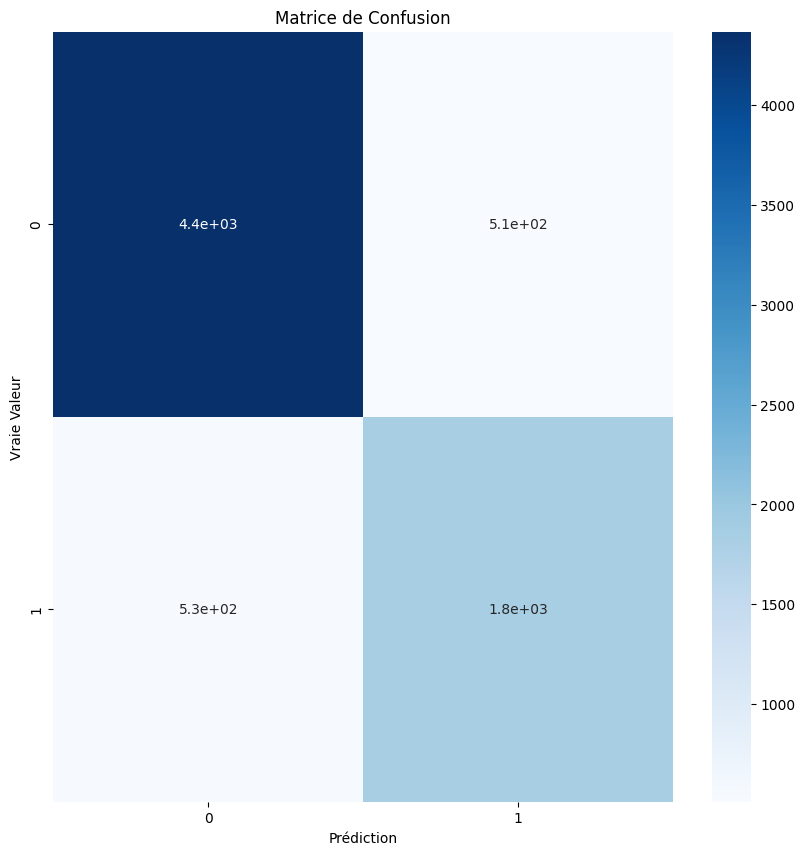

In [48]:
# Graphique de la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.show()

In [49]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(dt, 'modele_decision_tree.pkl')


['modele_decision_tree.pkl']